#  Introduction and Summary
This notebook uses a variety of Machine Learning models on data about shared micromobility services in Austin, Texas. In this case, micromobility refers to both scooters and bicycles which can be rented and dropped off at dockless locations. The data can be found <a href="https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r">here</a>.

Initial analysis of the data shows:
1. Usage can vary regardless of time, but tends to be highest in the afternoons, such as between 3pm - 5pm. 
2. Usage continues to vary regardless of month, but tends to be highest in March and August. This can be tied to SXSW in March and the beginning of the school year for UT Austin in August. 
3. Rain does not seem to impact usage of micromobility services. 
4. Typical linear regression models don't work well with this data, but a Decision Tree Classifier may be the best fit. 

# Load Libraries and Data 
We'll import other libraries as we use them throughout the notebook.

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Import data, drop unnecessary columns, and update data types
all_vehicles = pd.read_csv("data/all_summary.csv")
all_vehicles = all_vehicles.drop('Unnamed: 0', axis=1)

In [3]:
all_vehicles.head()

,month,hour,year,day,count,date,maxtemp,atemp,mintemp,maxhum,ahum,minhum,maxwind,awind,minwind,prec,day_of_week,vehicle_type,vehicle_encoded
0,1,0,2019,1,342,2019-01-01,46,41,36,97,83,76,21,11,0,0,1,scooter,0
1,1,0,2019,2,79,2019-01-02,41,38,37,97,92,79,15,10,8,1,2,scooter,0
2,1,0,2019,3,16,2019-01-03,52,40,31,97,85,53,13,7,0,1,3,scooter,0
3,1,0,2019,4,82,2019-01-04,67,46,30,96,66,31,10,3,0,1,4,scooter,0
4,1,0,2019,5,188,2019-01-05,73,49,32,93,66,24,13,4,0,0,5,scooter,0


# Exploratory Data Analysis

<b>Analysis</b>
1. Demand can be higher or lower regardless of hour. For example, hour 15 has points at both ~3000 and 0. Therefore, we should expect demand by hour to be highly variable. 
2. Usage can be highest in the months of March and August. This ties to SXSW and the beginning of the school year for UT Austin, where many bikes and scooters are located. 
3. Usage doesn't seem to be impacted by average temperate, humidity, wind, or precipitation. 

In [4]:
# Make sure data is cleaned up before plotting
all_vehicles = all_vehicles.dropna()

In [5]:
all_vehicles['maxtemp'] = all_vehicles['maxtemp'].astype('int')
all_vehicles['atemp'] = all_vehicles['atemp'].astype('int')
all_vehicles['mintemp'] = all_vehicles['mintemp'].astype('int')
all_vehicles['maxhum'] = all_vehicles['maxhum'].astype('int')
all_vehicles['ahum'] = all_vehicles['ahum'].astype('int')
all_vehicles['minhum'] = all_vehicles['minhum'].astype('int')
all_vehicles['maxwind'] = all_vehicles['maxwind'].astype('int')
all_vehicles['awind'] = all_vehicles['awind'].astype('int')
all_vehicles['minwind'] = all_vehicles['minwind'].astype('int')
all_vehicles['prec'] = all_vehicles['prec'].astype('int')
all_vehicles['day_of_week'] = all_vehicles['day_of_week'].astype('int')

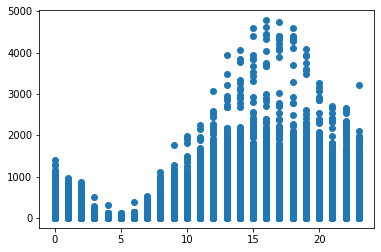

In [6]:
# Plot count against hours, months, and select weather variables
plt.scatter(all_vehicles['hour'], all_vehicles['count'])

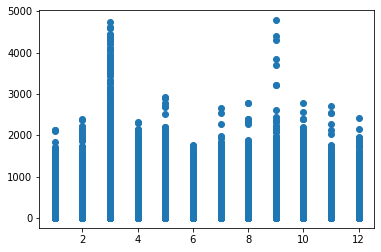

In [7]:
plt.scatter(all_vehicles['month'], all_vehicles['count'])

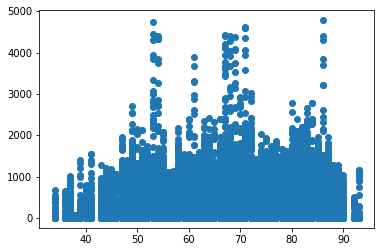

In [8]:
plt.scatter(all_vehicles['atemp'], all_vehicles['count'])

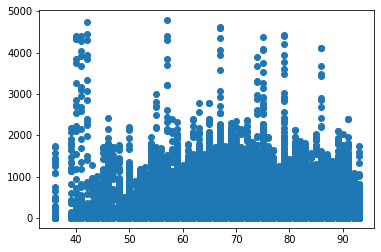

In [9]:
plt.scatter(all_vehicles['ahum'], all_vehicles['count'])

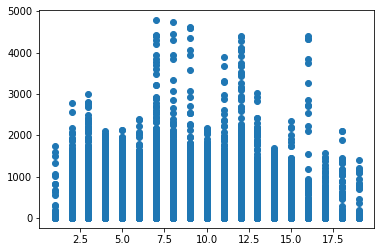

In [10]:
plt.scatter(all_vehicles['awind'], all_vehicles['count'])

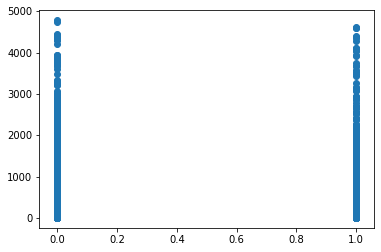

In [11]:
plt.scatter(all_vehicles['prec'], all_vehicles['count'])

# Linear Regressions
Now that the data is cleaned, we can try our first linear regression against the data to see which variables best predict the number of devices rented. 

Upon initial evaluation, the following variables seem to have a relationship with demand:
 * hour
 * average temperature 
 * day of week
 * vehicle type (scooter vs bike)
 * month
 * average humidity 
 
However, the initial model doesn't work very well, with an adjusted R-squared of 0.549 and a testing score of 0.39. The plot also seems to indicate that there may not be a linear relationship at play with this data. 

In [12]:
# Use statsmodels to review regression results
Y = all_vehicles['count']
X = all_vehicles[['hour', 'atemp', 'day_of_week','vehicle_encoded','month','ahum']]

In [13]:
model = sm.OLS(Y,X)
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              4685.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):                        0.00
Time:                        08:57:57   Log-Likelihood:                     -1.7003e+05
No. Observations:               23128   AIC:                                  3.401e+05
Df Residuals:                   23122   BIC:                                  3.401e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
hour               21.0742      0.354     59.499      0.000      20.380      21.768
atemp               1.7218      0.148     11.612      0.000       1.431       2.012
day_of_week        25.9983      1.218     21.346      0.000      23.611      28.386
vehicle_encoded  -490.3677      4.958    -98.895      0.000    -500.087    -480.649
month              -3.8278      0.820     -4.671      0.000      -5.434      -2.221
ahum                1.4472      0.148      9.790      0.000       1.157       1.737
==============================================================================
Omnibus:                    14418.823   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325636.075
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      20.625   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Assign the data to X and y
X = all_vehicles[['hour', 'atemp', 'day_of_week','vehicle_encoded','month','ahum']]
y = all_vehicles['count'].values.reshape(-1,1)
print(X.shape, y.shape)

(23128, 6) (23128, 1)


In [16]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
# Fit the model to the training data and calculate the scores
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.36208414911583486
Testing Score: 0.3853888425218427


Text(0.5, 1.0, 'Residual Plot')

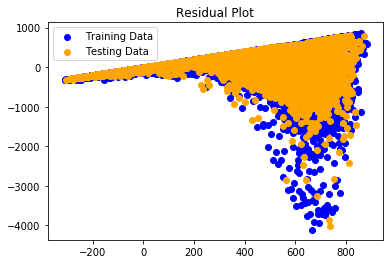

In [19]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test , c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")

# Feature Engineering 
To improve our linear regression model, I have binned the hours and months. The hours are binned at 4 hour intervals and the months are binned at 3 month intervals. 

With these grouped variables, we see that the other variables still have an impact, with the inclusion of min temperature. 

However, the model actually got worse. The adjusted r-squared value is 0.554 (versus 0.559) and the testing score is still 0.39. The residual plot continues to indicate that this relationship may not be linear. 

In [20]:
all_vehicles.head()

,month,hour,year,day,count,date,maxtemp,atemp,mintemp,maxhum,ahum,minhum,maxwind,awind,minwind,prec,day_of_week,vehicle_type,vehicle_encoded
0,1,0,2019,1,342,2019-01-01,46,41,36,97,83,76,21,11,0,0,1,scooter,0
1,1,0,2019,2,79,2019-01-02,41,38,37,97,92,79,15,10,8,1,2,scooter,0
2,1,0,2019,3,16,2019-01-03,52,40,31,97,85,53,13,7,0,1,3,scooter,0
3,1,0,2019,4,82,2019-01-04,67,46,30,96,66,31,10,3,0,1,4,scooter,0
4,1,0,2019,5,188,2019-01-05,73,49,32,93,66,24,13,4,0,0,5,scooter,0


In [21]:
# Segment Hour and Month data
all_vehicles['hour_encoded'] = pd.cut(all_vehicles['hour'], bins=6, labels=[0,1,2,3,4,5])
all_vehicles['month_encoded'] = pd.cut(all_vehicles['month'],bins=4, labels=[0,1,2,3])
all_vehicles['hour_encoded'] = all_vehicles['hour_encoded'].astype('int')
all_vehicles['month_encoded'] = all_vehicles['month_encoded'].astype('int')

In [22]:
#reevaluate using statsmodels
Y = all_vehicles['count']

In [23]:
X = all_vehicles[['hour_encoded', 'month_encoded','atemp','vehicle_encoded','day_of_week','awind','ahum','mintemp']]

In [24]:
model = sm.OLS(Y,X)

In [25]:
results = model.fit()

In [26]:
# adjusted r-squared slightlight improved
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.554
Model:                            OLS   Adj. R-squared (uncentered):              0.554
Method:                 Least Squares   F-statistic:                              3588.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):                        0.00
Time:                        08:58:02   Log-Likelihood:                     -1.6989e+05
No. Observations:               23128   AIC:                                  3.398e+05
Df Residuals:                   23120   BIC:                                  3.399e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
hour_encoded       84.9716      1.443     58.872      0.000      82.143      87.801
month_encoded     -19.1288      2.498     -7.658      0.000     -24.025     -14.233
atemp               5.3683      0.412     13.046      0.000       4.562       6.175
vehicle_encoded  -492.2035      4.937    -99.699      0.000    -501.880    -482.527
day_of_week        24.6266      1.219     20.195      0.000      22.236      27.017
awind               4.5675      0.672      6.797      0.000       3.250       5.885
ahum                1.4422      0.151      9.580      0.000       1.147       1.737
mintemp            -4.1032      0.442     -9.282      0.000      -4.970      -3.237
==============================================================================
Omnibus:                    14254.043   Durbin-Watson:                   0.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           312438.901
Skew:                           2.578   Prob(JB):                         0.00
Kurtosis:                      20.252   Cond. No.                         239.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# evaluate the linear regression
X = all_vehicles[['hour_encoded', 'month_encoded','atemp','vehicle_encoded','day_of_week','awind','ahum','mintemp']]
y = all_vehicles['count'].values.reshape(-1,1)
print(X.shape, y.shape)

(23128, 8) (23128, 1)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.3672324581371462
Testing Score: 0.388879071004372


Text(0.5, 1.0, 'Residual Plot')

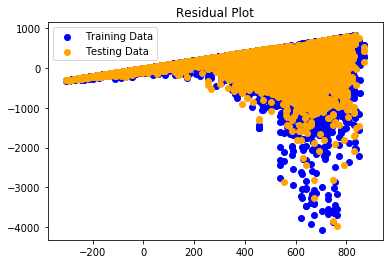

In [31]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Other Linear Models 
Perhaps the LinearRegression model is not the best fit for this data, but other linear models could work better. 

I tested:
* Scaled Linear Regression
* LASSO model
* Ridge model
* ElasticNet model

Out of these, the scaled linear regression and Ridge model had the lowest R2 (~0.38).

In [32]:
# Test 1: Scaled Linear Regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [34]:
# Transform the training and testing data using the X_scaler and 
# y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [35]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

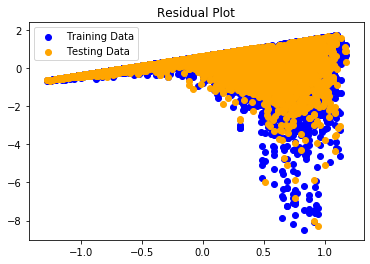

In [36]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [37]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled)
# to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5206367361082428, R2: 0.38887907100437213


In [38]:
# LASSO model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.519908317512917, R2: 0.38973408529322295


In [39]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5206367163803711, R2: 0.3888790941608543


In [40]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.520046557903069, R2: 0.38957181937959207


# Decision Tree Classifier Test 
As a final test, I used the Decision Tree Classifier to analyze the data. 

I used the categories I knew were meaningful in the Linear Regressions and tried to use the Decision Tree Classifier to predict the total count. The score for this was only ~0.03. 

I then decided to bin the Count data so that it was in groups of ~ 470 each. This improved the accuracy to ~0.90!

I also checked if my linear regressions would improve by binning the Count data. This actually decreased the accuracy from ~0.38 to ~0.29.

Let's save the decision tree model as a pickle file and use it on Flask!

In [41]:
from sklearn import tree
target = all_vehicles['count']
data = all_vehicles[['day', 'day_of_week','month','year','hour','atemp','ahum',
                    'awind','prec','vehicle_encoded','hour_encoded',
                     'month_encoded']]
data.head()

,day,day_of_week,month,year,hour,atemp,ahum,awind,prec,vehicle_encoded,hour_encoded,month_encoded
0,1,1,1,2019,0,41,83,11,0,0,0,0
1,2,2,1,2019,0,38,92,10,1,0,0,0
2,3,3,1,2019,0,40,85,7,1,0,0,0
3,4,4,1,2019,0,46,66,3,1,0,0,0
4,5,5,1,2019,0,49,66,4,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [43]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.03528190937391906

In [44]:
data['count_encoded'] = pd.cut(all_vehicles['count'], bins=11, labels=[0,1,2,3,4,5,
                                                                       6,7,8,9,10])
data['count_encoded'] = data['count_encoded'].astype('int')

C:\Users\Ashley\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ashley\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
data.sort_values('count_encoded', ascending=False).head()

,day,day_of_week,month,year,hour,atemp,ahum,awind,prec,vehicle_encoded,hour_encoded,month_encoded,count_encoded
1920,10,6,3,2019,16,67,79,7,0,0,4,0,10
9456,7,5,9,2019,15,86,57,7,0,0,3,2,10
1985,13,2,3,2019,18,69,75,12,1,0,4,0,10
1982,10,6,3,2019,18,67,79,7,0,0,4,0,10
1981,9,5,3,2019,18,71,67,9,1,0,4,0,10


In [46]:
target = data['count_encoded']
new_data = data.drop('count_encoded', axis=1)
data.head()

,day,day_of_week,month,year,hour,atemp,ahum,awind,prec,vehicle_encoded,hour_encoded,month_encoded,count_encoded
0,1,1,1,2019,0,41,83,11,0,0,0,0,0
1,2,2,1,2019,0,38,92,10,1,0,0,0,0
2,3,3,1,2019,0,40,85,7,1,0,0,0,0
3,4,4,1,2019,0,46,66,3,1,0,0,0,0
4,5,5,1,2019,0,49,66,4,0,0,0,0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, target, random_state=42)

In [48]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9021099965409892

In [49]:
# save the better performing model as a pickle file
import pickle
pickle.dump(clf2,open("model.pkl","wb"))

In [50]:
# run a sample data set
to_predict_list=[1,1,1,2019,0,51,83,11,0,0,0,0]
to_predict = np.array(to_predict_list).reshape(1,12)

In [51]:
# load in a pickle 
loaded_model = pickle.load(open("model.pkl","rb"))

In [52]:
# print the predicted result
result = loaded_model.predict(to_predict)
print(result)

[0]


In [53]:
# see if linear regressions are also improved with this encoding
# first, bin the count data
all_vehicles['count_encoded'] = pd.cut(all_vehicles['count'], bins=11, labels=[0,1,2,3,4,5,
                                                                       6,7,8,9,10])
all_vehicles['count_encoded'] = all_vehicles['count_encoded'].astype('int')

In [54]:
# evaluate the linear regression
X = all_vehicles[['hour_encoded', 'month_encoded','atemp','vehicle_encoded','day_of_week','awind','ahum','mintemp']]
y = all_vehicles['count_encoded'].values.reshape(-1,1)
print(X.shape, y.shape)

(23128, 8) (23128, 1)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [58]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2681546402370316
Testing Score: 0.28563332464341895


In [59]:
# save modified vehicle data to ETL folder for tranformation to postgres
all_vehicles.to_csv("etl/all_vehicles_ml.csv")